In [11]:
from afib_utils import *
from wfdb import processing

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
records = get_records()

In [4]:
# afib are even numbered p's 
afib, afib_cont, regular, regular_cont = extract_afib_records(records)
test, test_cont = extract_test_records(records)
afib

['data/p02',
 'data/p04',
 'data/p06',
 'data/p08',
 'data/p10',
 'data/p12',
 'data/p14',
 'data/p16',
 'data/p18',
 'data/p20',
 'data/p22',
 'data/p24',
 'data/p26',
 'data/p28',
 'data/p30',
 'data/p32',
 'data/p34',
 'data/p36',
 'data/p38',
 'data/p40',
 'data/p42',
 'data/p44',
 'data/p46',
 'data/p48',
 'data/p50']


ECG channel type: ECG0


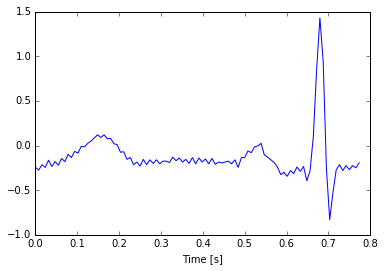


ECG channel type: ECG0


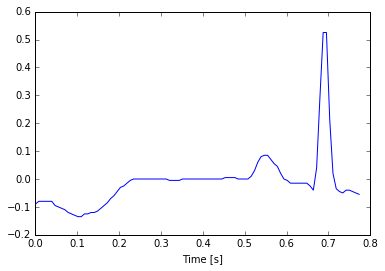


ECG channel type: ECG0


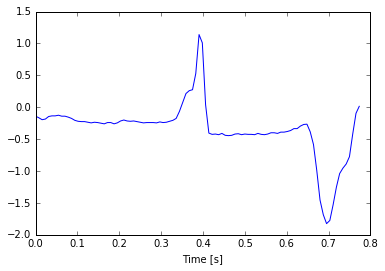


ECG channel type: ECG0


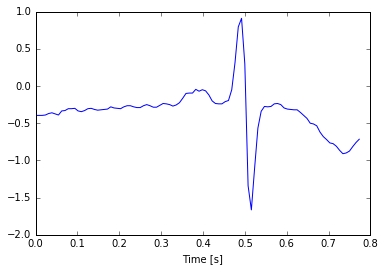


ECG channel type: ECG0


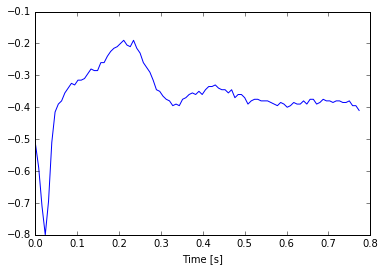


ECG channel type: ECG0


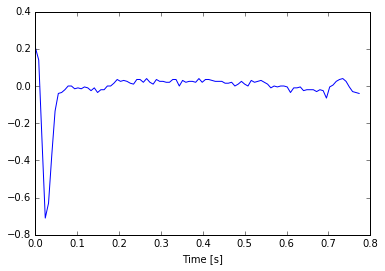


ECG channel type: ECG0


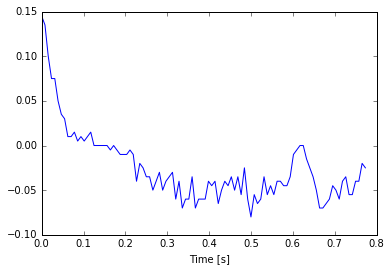


ECG channel type: ECG0


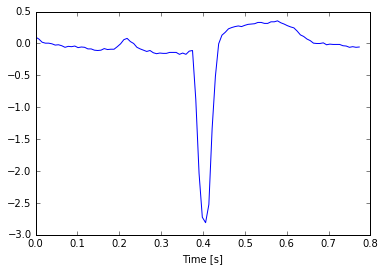


ECG channel type: ECG0


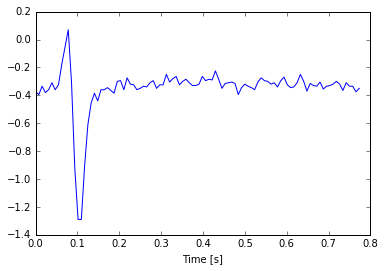


ECG channel type: ECG0


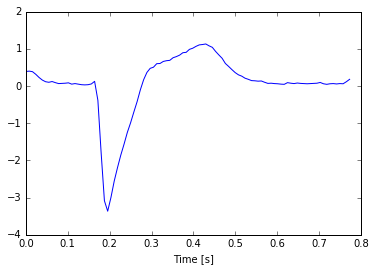


ECG channel type: ECG0


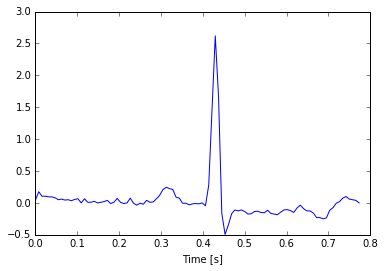


ECG channel type: ECG0


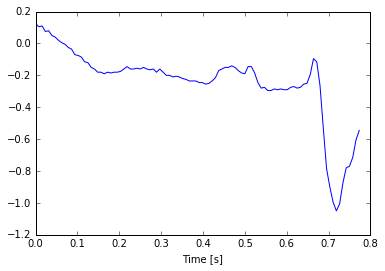


ECG channel type: ECG0


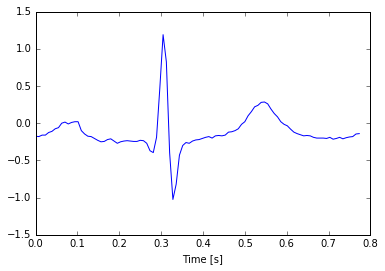


ECG channel type: ECG0


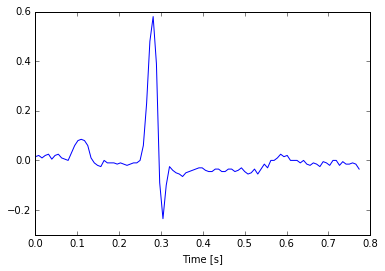


ECG channel type: ECG0


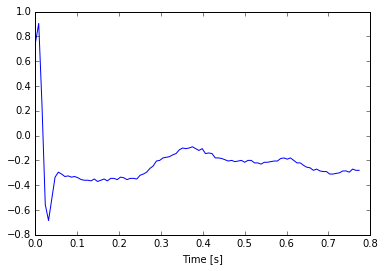


ECG channel type: ECG0


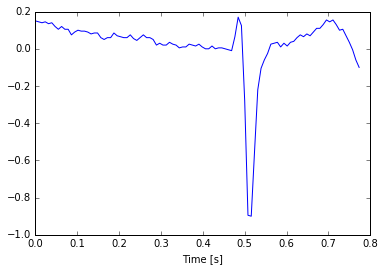


ECG channel type: ECG0


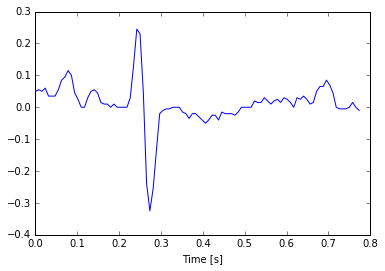


ECG channel type: ECG0


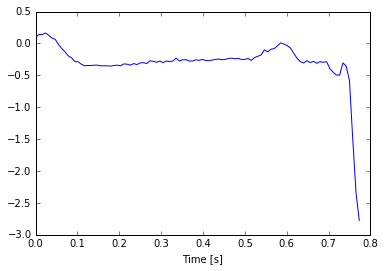


ECG channel type: ECG0


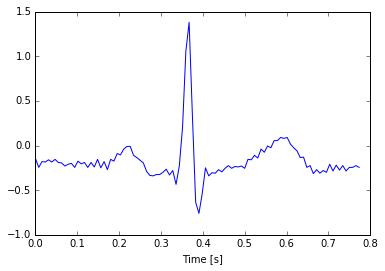


ECG channel type: ECG0


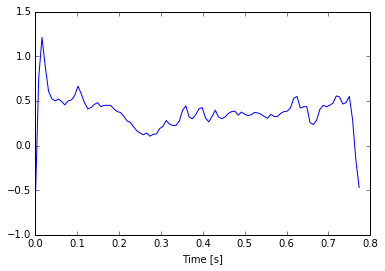


ECG channel type: ECG0


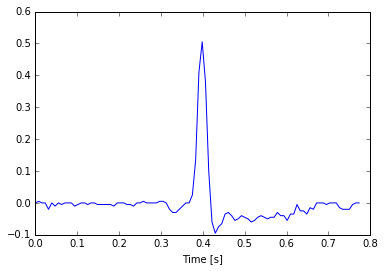


ECG channel type: ECG0


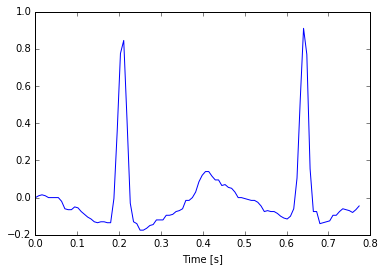


ECG channel type: ECG0


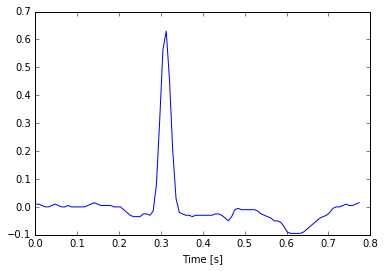


ECG channel type: ECG0


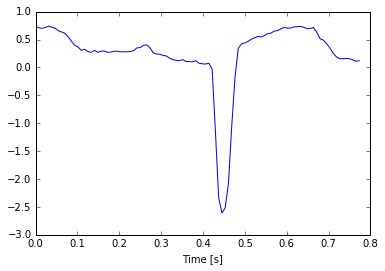


ECG channel type: ECG0


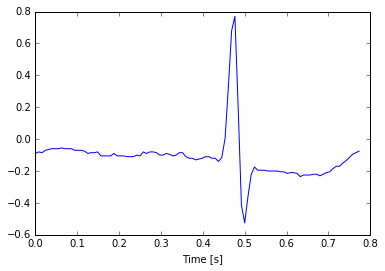

In [89]:
for afib in afib_cont:
    plot_ekg(afib)

In [5]:
PATH = 'data/p01'
AFIB = 'data/p04'
# have .dat, .hea, .qrs

In [6]:
record = wf.rdsamp(PATH)
# looks for .hea
# annotation = wf.rdann(path, 'atr')

In [9]:
record

(array([[-0.795,  0.115],
        [ 0.35 ,  0.015],
        [-0.73 ,  0.085],
        ..., 
        [-0.21 , -0.015],
        [-0.595, -0.045],
        [-0.235,  0.025]]),
 {'base_date': None,
  'base_time': None,
  'comments': [],
  'fs': 128,
  'n_sig': 2,
  'sig_len': 230400,
  'sig_name': ['ECG0', 'ECG1'],
  'units': ['mV', 'mV']})

In [8]:
len(record[0])
# 0.003 inbetween e. entry

230400

In [18]:
afib_record = wf.rdsamp(AFIB)
afib_record

(array([[  2.50000000e-02,   0.00000000e+00],
        [  3.50000000e-02,   0.00000000e+00],
        [  6.00000000e-02,   0.00000000e+00],
        ..., 
        [ -7.50000000e-02,   1.45000000e-01],
        [ -7.50000000e-02,   1.50000000e-01],
        [  5.91100000e+01,   5.91100000e+01]]),
 {'base_date': None,
  'base_time': None,
  'comments': [],
  'fs': 128,
  'n_sig': 2,
  'sig_len': 230400,
  'sig_name': ['ECG0', 'ECG1'],
  'units': ['mV', 'mV']})

In [19]:
record = wf.rdrecord(AFIB) 

In [20]:
display(record.__dict__)

{'adc_gain': [200.0, 200.0],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [-29609, -4246],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['p04.dat', 'p04.dat'],
 'fmt': ['16', '16'],
 'fs': 128,
 'init_value': [5, 0],
 'n_sig': 2,
 'p_signal': array([[  2.50000000e-02,   0.00000000e+00],
        [  3.50000000e-02,   0.00000000e+00],
        [  6.00000000e-02,   0.00000000e+00],
        ..., 
        [ -7.50000000e-02,   1.45000000e-01],
        [ -7.50000000e-02,   1.50000000e-01],
        [  5.91100000e+01,   5.91100000e+01]]),
 'record_name': 'p04',
 'samps_per_frame': [1, 1],
 'sig_len': 230400,
 'sig_name': ['ECG0', 'ECG1'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

 ECG channel type: ECG0


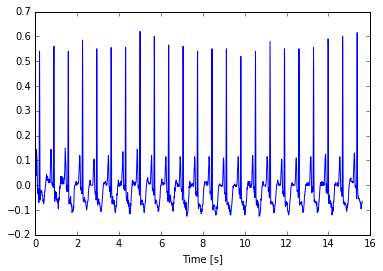

In [24]:
chid = 0
data = record.p_signal
channel = data[:, chid]

print 'ECG channel type:', record.sig_name[chid]

# Plot only the first 2000 samples
howmany = 2000

# Calculate time values in seconds
times = np.arange(howmany, dtype = 'float') / record.fs
plt.plot(times, channel[ : howmany])
plt.xlabel('Time [s]')
plt.show()

In [ ]:
# frequency pass 

In [22]:
# QRS Detection
sig, fields = wf.rdsamp(regular[0])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# qrs_inds = xqrs.detect()
qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


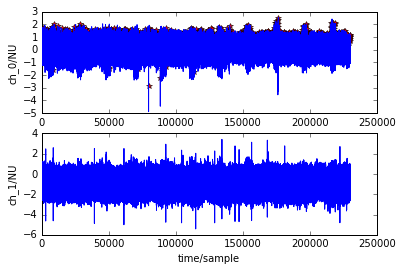

In [17]:
wf.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [24]:
qrs_inds

array([    32,    136,    257, ..., 230138, 230234, 230332])